In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Dirac_Exciton import Dirac_Exciton
from ase.units import *
from scipy.optimize import curve_fit
from tqdm import tqdm
%matplotlib inline

In [2]:
a=3.193 # lattice parameter
t=1.10  # effective hopping parameter
delta=1.66  # gap
epsilon=1 # substrate dielectric contant
r0=33.875 # screening length

In [3]:
alpha=np.linspace(0.2,8,40)
epsilon=4.075/alpha
C_fxc=[];Eb=[]
for e in tqdm(epsilon):
    dirac=Dirac_Exciton(params=(a,t,delta,r0,e))
    dirac.exciton_hamiltonian(N=60,qmax=0.4)
    ES,DS=dirac.exciton_states(nstates=1,plot=False,save=False,data=True)
    dirac.susceptibility(eta=0.0001,wmin=ES[0],wmax=ES[0],npoints=1,plot=False,exciton=False)
    C_fxc.append(1/dirac.chi0.real)
    Eb.append((dirac.delta-ES[0]))

100%|██████████| 40/40 [00:19<00:00,  2.06it/s]


In [4]:
C_fxc=np.array(C_fxc).flatten()
Eb=np.array(Eb)

$$C=\frac{1}{\chi_0({E_{X}})}$$

$$f_{xc}=\frac{C}{q^2}$$

In [5]:
func=lambda x,a,b,c:a*x**(-b)+c
popt,pcov=curve_fit(func,alpha,C_fxc)

(0, 8)

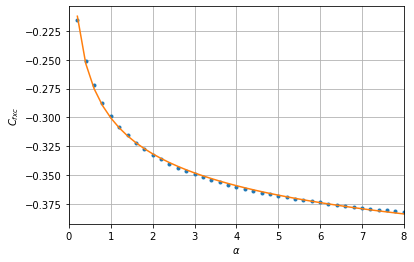

In [6]:
plt.plot(alpha,C_fxc,'.')
plt.plot(alpha,func(alpha,*popt),'-')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$C_{fxc}$')
plt.grid()
plt.xlim([0,8])
# plt.savefig('figures/C(alpha).png',dpi=600)

(0, 0.9340300396477801)

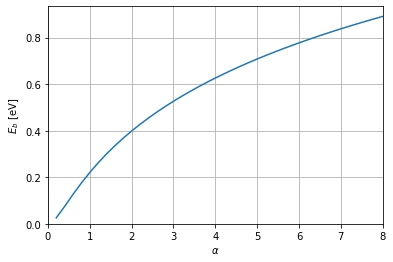

In [7]:
plt.plot(alpha,Eb,'-')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$E_{b}$ [eV]')
plt.grid()
plt.xlim([0,8])
plt.ylim([0,None])
# plt.savefig('figures/Eb(alpha).png',dpi=600)

(0, 0.9340300396477801)

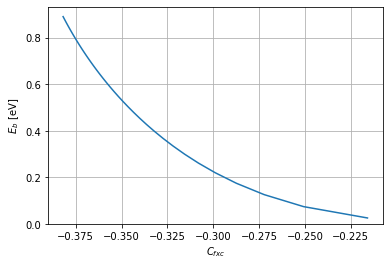

In [8]:
plt.plot(C_fxc,Eb,'-')
plt.xlabel(r'$C_{fxc}$')
plt.ylabel(r'$E_{b}$ [eV]')
plt.grid()
plt.ylim([0,None])
# plt.savefig('figures/Eb(C).png',dpi=600)